In [ ]:
# Reference:
# 1. https://medium.com/deep-learning-construction/neural-network-build-from-scratch-without-frameworks-1-302dcfb46127

# What is the learning objectives of deep learning?
# To minimize the value of the loss function
# For example, a linear regression y = w*x + b
# the weights (w), and bias (b) are adjusted during the training process
# the loss function is (ŷ - y)² where ŷ is the prediction and y is the actual value.

# NumPy

99 36.36082450768926
199 28.306346444548428
299 22.60731585488749
399 18.57486475952902
499 15.72160887962664
599 13.702705219155003
699 12.274161554904992
799 11.26334046783221
899 10.548090691221327
999 10.041982160356092
1099 9.68385940999464
1199 9.430450232715042
1299 9.251135984948139
1399 9.124251314102116
1499 9.034466003194495
1599 8.970932459018421
1699 8.925974930882335
1799 8.89416203419428
1899 8.871650486251049
1999 8.855720743297681
Result: y = 0.006570904023025567 + 0.8566089712680044 x + -0.0011335902842868147 x^2 + -0.09331163142457642 x^3


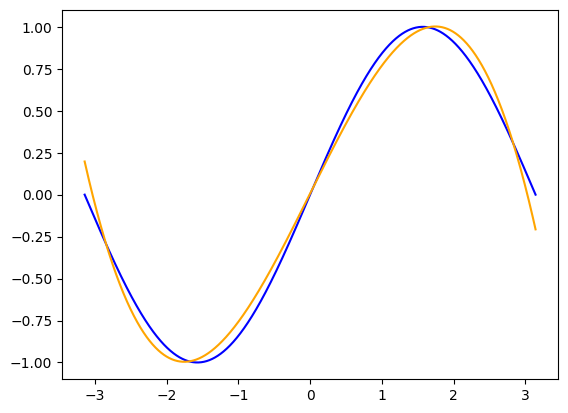

In [19]:
# -*- coding: utf-8 -*-

# import torch
import numpy as np
import math
import matplotlib.pyplot as plt

dtype = np.float64

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = np.sin(x)

plt.plot(x, y, 'blue')

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
  # Forward pass: compute predicted y
  y_pred = a + b * x + c * x ** 2 + d * x ** 3

  # Compute and print loss
  loss = ((y_pred - y) ** 2).sum()
  if t % 100 == 99:
    print(t, loss)

  # Backprop to compute gradients of a, b, c, d with respect to loss
  grad_y_pred = 2.0 * (y_pred - y)
  # d/da (y_pred - y)²
  #      2 * (y_pred - y)
  grad_a = grad_y_pred.sum()
  
  # d/db (a + (b * x) + (c * x²) + (d * x³) - y)²
  #      2 * (y_pred - y) * x
  grad_b = (grad_y_pred * x).sum()

  # d/dc (a + (b * x) + (c * x²) + (d * x³) - y)²
  #      2 * (y_pred - y) * x²
  grad_c = (grad_y_pred * x ** 2).sum()

  # d/dd (a + (b * x) + (c * x²) + (d * x³) - y)²
  #      2 * (y_pred - y) * x³
  grad_d = (grad_y_pred * x ** 3).sum()

  # Update weights using gradient descent
  a -= learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

plt.plot(x, y_pred, 'orange')

%reset -f

99 1381.5601077085162
199 916.9208439594084
299 609.567766896786
399 406.25245229042997
499 271.7549459570166
599 182.77937397764552
699 123.9166140524962
799 84.97404051733196
899 59.20941397399891
999 42.16275479976897
1099 30.883717155417436
1199 23.42054688425192
1299 18.48205363219886
1399 15.214018246569362
1499 13.051291462664938
1599 11.619958283831854
1699 10.672618793427397
1799 10.045574630897399
1899 9.630505840676083
1999 9.355733196457518
Result: y = 0.003570097900751968 + 0.8344211084777818 x + -0.0006159012945652046 x^2 + -0.09015560115627635 x^3


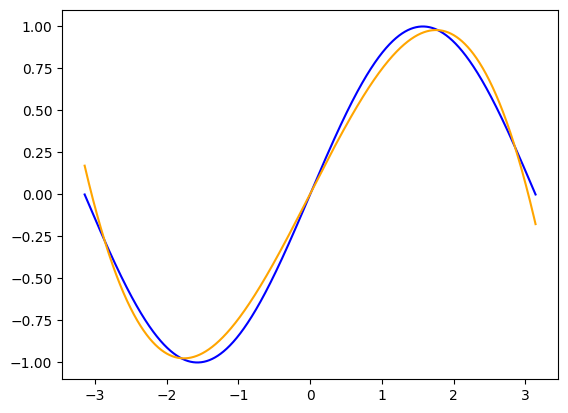

In [31]:
# -*- coding: utf-8 -*-

import numpy as np
import math
import matplotlib.pyplot as plt

class Module: pass

class CubicPolynomial(Module):
  a: np.float64
  b: np.float64
  c: np.float64
  d: np.float64

  learning_rate: np.float64

  def __init__(self, learning_rate=1e-6) -> None:
    self.a = np.random.randn()
    self.b = np.random.randn()
    self.c = np.random.randn()
    self.d = np.random.randn()

    self.learning_rate = learning_rate

  def __call__(self, x: np.ndarray):
    return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
  
  def loss_ln(self, y_pred: np.ndarray, y: np.ndarray) -> np.float64:
    return ((y_pred - y) ** 2).sum()
  
  def zero_grad(self) -> None:
    # Manually zero the gradients after updating weights
    self.grad_a = None
    self.grad_b = None
    self.grad_c = None
    self.grad_d = None
  
  def backward(self, y_pred: np.ndarray) -> None:
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    # d/da (y_pred - y)²
    # 2 * (y_pred - y)
    self.grad_a = grad_y_pred.sum()
    
    # d/db (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x
    self.grad_b = (grad_y_pred * x).sum()

    # d/dc (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x²
    self.grad_c = (grad_y_pred * x ** 2).sum()

    # d/dd (a + (b * x) + (c * x²) + (d * x³) - y)²
    # 2 * (y_pred - y) * x³
    self.grad_d = (grad_y_pred * x ** 3).sum()

  def step(self) -> None:
    # Update weights using gradient descent
    self.a -= self.learning_rate * self.grad_a
    self.b -= self.learning_rate * self.grad_b
    self.c -= self.learning_rate * self.grad_c
    self.d -= self.learning_rate * self.grad_d

dtype = np.float64

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = np.sin(x)

plt.plot(x, y, 'blue')

learning_rate = 1e-6
model = CubicPolynomial(learning_rate=learning_rate)

for t in range(2000):
  # Forward pass: compute predicted y
  y_pred = model(x)

  # Compute and print loss
  loss = model.loss_ln(y_pred, y)
  if t % 100 == 99:
    print(t, loss)

  # Before the backward pass, use the optimizer object to zero all of the
  # gradients for the variables it will update (which are the learnable
  # weights of the model). This is because by default, gradients are
  # accumulated in buffers( i.e, not overwritten) whenever .backward()
  # is called. Checkout docs of torch.autograd.backward for more details.
  model.zero_grad()

  # Backward pass: compute gradient of the loss with respect to model
  # parameters
  model.backward(y_pred)

  # Calling the step function on an Optimizer makes an update to its
  # parameters
  model.step()


print(f'Result: y = {model.a} + {model.b} x + {model.c} x^2 + {model.d} x^3')

plt.plot(x, y_pred, 'orange')

%reset -f